In [6]:
import pandas as pd
import scipy.stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/content/CandyData.csv')

Описание данных

– chocolate/fruity/caramel/peanutalmondy/nougat/crispedricewafer — содержит ли конфета шоколад/фруктовый ароматизатор/карамель/арахис/нугу/воздушный рис (1 – да/ 0 – нет)

– hard — конфета твердая (1 – да/ 0 – нет)

– bar — конфета похожа на батончик (1 – да/ 0 – нет)

– pluribus — в упаковке одна конфета или несколько (1 – несколько/ 0 – одна)

– sugarpercent — процент сахара в конфете

– pricepercent — цена конфеты

– winpercent — рейтинг конфеты

In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Выберите переменные sugarpercent, pricepercent и winpercent. Проверьте предпосылку о мультиколлинеарности и укажите верное утверждение. Выберите один верный ответ.

In [5]:
df[["sugarpercent", "pricepercent", "winpercent"]].corr()

,sugarpercent,pricepercent,winpercent
sugarpercent,1.000000,0.329706,0.229151
pricepercent,0.329706,1.000000,0.345325
winpercent,0.229151,0.345325,1.000000


Постройте линейную модель, где зависимой переменной выступает winpercent, а независимой – sugarpercent. Укажите, верно ли следующее утверждение: на уровне значимости 0.05 процент сахара в конфете статистически значимо влияет на рейтинг конфеты.

In [8]:
X = df['sugarpercent']
y = df['winpercent']

res = scipy.stats.linregress(X, y)

Постройте линейную модель, где зависимой переменной выступает winpercent, а независимой – sugarpercent. Чему равно значение оценки коэффициента нашей независимой переменной? Выберите один верный ответ.

In [9]:
print(res)

LinregressResult(slope=11.923863286810722, intercept=44.60944180753465, rvalue=0.22915065712800645, pvalue=0.034897896761698376, stderr=5.5596076890773345, intercept_stderr=3.0860859920175674)


Постройте линейную модель, где зависимой переменной выступает winpercent, а независимой – sugarpercent. Чему будет равно значение оценки коэффициента детерминации в данной модели? Выберите один верный ответ.

In [13]:
res.rvalue ** 2

0.052510023662197175

In [11]:
import matplotlib.pyplot as plt

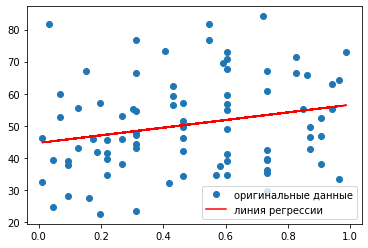

In [12]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

Постройте линейную модель, где зависимой переменной выступает winpercent, а независимыми – sugarpercent и pricepercent. Чему будет равно значение оценки коэффициента при цене конфеты? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой; если значение отрицательное, не забудьте указать минус перед числом.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

array([16.])

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(df[["sugarpercent", "pricepercent"]], df["winpercent"])

LinearRegression()

In [19]:
lr.coef_

array([ 6.73107225, 15.58649425])

In [21]:
lr.score(df[["sugarpercent", "pricepercent"]], df["winpercent"])

0.13416375686496818

In [27]:
lr.predict(np.array([[0, 0]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([39.78672384])